# Proyecto final :
## Semeion Handwritten Digit Data Set 
### Agustín Jofré Millet

###### Los datos son una sellección de 1593 dígitos escritos a mano. Estos consisten en filas de datos, cada fila contiene una imagen de 16x16 píxeles ( las primeras 256 columnas) , seguidas de 10 dígitos de unos y ceros , que representan el valor de Y.

###### Se han empleadotres técnicas de clasificación para resolver el problema de reconocimiento de digitos. Regresión Logistica con sklearn PCA , support Vector Machines y  Redes Neuronales ( algoritmo de retopropagación).



## 1. Regresión Logistica con Sklearn PCA

El PCA es un metodos de transformación lineal, utiliza técnicas no supervisadas, a diferencia de los supervisados que tiene como objetivo predecir una variable. En el caso de los PCA la variable Y no se tiene encuenta para predecir.
Utilizamos pca.explained_variance_ratio_ para decidir el número optimo de componentes principales a utilizar. El sumatorio de la varianza acumulada de cada componente siempre es 1. El objetivo de esto es utiliar el numero mínimo de componentes para explicar los datos. Se selecciona el punto donde la recta deja crecer tan rapido , por lo que se ha seleccionado hasta el componente 50 , en torno al 80% de la varianza.

Procedemos a separar los datos en ejemplos de entrenamiento y test, dejando para el test un 20%. Aplicamos el método de regresión lineal. obtenemos el vector Theta que minimiza el error, para un valor de lambda = 0. Tras variar los valores de lambda , la curva de aprendizaje para la regresón lineal no varia mucho . Se obtiene un poco de sesgo (Bias: ambas curvas muy juntas y altas en la gráfica) , pero al bajar lamnda al minimo , no varia significativamente. por este motivo se deja lamnda al valor 0. Posibles soluciones a este sesgo , aumentar el grado del polinomio , mas caracteristicas, hipotesis mas complejas. Pero al ser muy poco el sesgo que hay no evaluamos estas posibilidades.

Por últmo evaluamos 10 ejemplos de entraniemto con sus test y obtenemos una presición del 92.78%. 

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from scipy.io import loadmat
from pandas.io.parsers import read_csv
import scipy.io as io
import pandas as pd
from sklearn.decomposition import PCA

from checkNNGradients import checkNNGradients

### Cargamos el conjunto de datos

In [2]:
data = read_csv("semeion.data",delimiter = r"\s+", header=None)
#data = pd.read_csv("semeion.data", sep=' ', header=None)

m = data.shape[0]

print (data.head())

   0    1    2    3    4    5    6    7    8    9   ...   256  257  258  259  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0 ...     1    0    0    0   
1  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0 ...     1    0    0    0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...     1    0    0    0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0 ...     1    0    0    0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...     1    0    0    0   

   260  261  262  263  264  265  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 266 columns]


#### Convertimos la matriz y en digitos del 0 al 9 y dividimos la tabla de datos en X  y etiquetas de clase y

In [3]:

data['y'] = data.iloc[:,256]*0 + data.iloc[:,257]*1 + data.iloc[:,258]*2 + data.iloc[:,259]*3 + data.iloc[:,260]*4 + \
                data.iloc[:,261]*5 + data.iloc[:,262]*6 + data.iloc[:,263]*7 + data.iloc[:,264]*8 + data.iloc[:,265]*9

#creamos X e y
X = data.iloc[:,:256]
#etiquetas = data.iloc[:,256:-1]
y = data['y']


print (X.shape)
#print (etiquetas.shape)
print (y.shape)

(1593, 256)
(1593,)


#### Vector X , donde X[i] es la varianza acumulada. Es decir Varianza de cada componente

Text(0,0.5,'Varianza acumulativa')

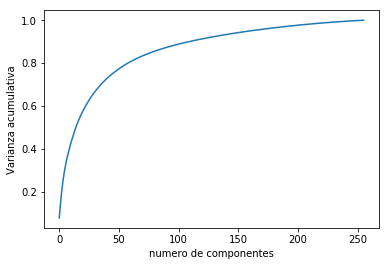

In [4]:
pca = PCA().fit(X)
var = pca.explained_variance_ratio_
#print (var)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('Varianza acumulativa')

#### probamos con 2 componentes

In [5]:
pca2 = PCA(50)
resultPca2 = pca2.fit_transform(X)
print(X.shape)
print(resultPca2.shape)

(1593, 256)
(1593, 50)


#### Varianza con 2 componentes

In [6]:
pca2.explained_variance_

array([4.19374298, 3.56674714, 3.0143676 , 2.49069342, 1.9929005 ,
       1.72766694, 1.49572806, 1.34690293, 1.16611981, 1.14176834,
       1.09444388, 0.95953653, 0.94340423, 0.91732   , 0.84721118,
       0.81829414, 0.73606195, 0.68642697, 0.65680428, 0.62718441,
       0.6054815 , 0.56737838, 0.53310068, 0.52218167, 0.49878285,
       0.4847692 , 0.47818687, 0.45772894, 0.42998356, 0.39579262,
       0.39206037, 0.37160237, 0.36424128, 0.35103406, 0.34548065,
       0.34195066, 0.32623485, 0.31221213, 0.29748641, 0.29083654,
       0.2774854 , 0.26562627, 0.26098139, 0.24884249, 0.24569003,
       0.23562798, 0.23049916, 0.2220677 , 0.21630827, 0.21156312])

##### Proyectamos el espacio de caracteristicas

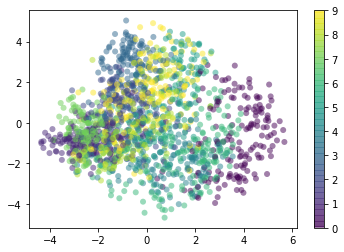

In [7]:
plt.scatter(resultPca2[:, 0], resultPca2[:, 1],c=y, edgecolor='none', alpha=0.5)
plt.colorbar();

In [8]:
aproximacion = pca2.inverse_transform(resultPca2)


#### Mostramos aleatoriamente un digito real, y otro de entrenamiento , X y aproximación

(-0.5, 15.5, 15.5, -0.5)

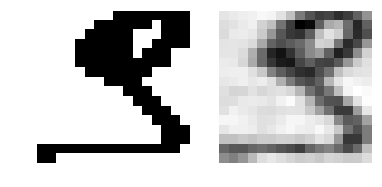

In [9]:
sample = np.random.randint(1, data.shape[0])
X = np.asarray(X) #paso a arrray de numpy


plt.figure();
plt.subplot(1, 2, 1);
plt.imshow(X[sample].reshape(16,16), cmap='Greys');
plt.axis('off')


plt.subplot(1, 2, 2);
plt.imshow(aproximacion[sample].reshape(16, 16), cmap='Greys') 
plt.axis('off')




#### Dividimos el conjunto de datos de entrenamiento , en entenamiento y prueba. 80% de entenamiento y 20% de prueba

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#pca = PCA(0.8) ## nº de componentes

#Entrenamos los ejemplos de entrenamiento , vaga la redundancia.
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
###pruena
#regresion lineal regularizada
def regLinealFuncCoste(X, y, theta, l ):
  
    
    h = X.dot(theta)
    
    J = 1.0/(2*m) * np.sum(np.square(h - y)) + l/(2*m) * np.sum(np.square(theta[1:]))
    
    grad = (((1/(m))*(h - (y)).T.dot(X) + (l/m) * (theta)) - theta[0]*l/m).flatten()

    
    return J, grad
theta = np.array([1, 1])
l= 1



print (X.shape)
print (y.shape)
print (theta.shape)

def min_lineal_reg(X, y, l=0.0, maxiter=10):
   
    initial_theta = np.zeros(X.shape[1] )
    costFunction = lambda t: regLinealFuncCoste(X, y, t, l)
    options = {'maxiter': maxiter}
    res = opt.minimize(costFunction, initial_theta, jac=True, method='TNC', options=options)
    return res.x  

l = 0
X2 = np.hstack((np.ones((X.shape[0], 1)), X))
theta = min_lineal_reg(X2, y, l)
theta





(1593, 256)
(1593,)
(2,)


array([ 0.09118   ,  0.2355385 ,  0.14802777,  0.06056417,  0.07687999,
        0.01421435,  0.10460415,  0.02965434,  0.03330853,  0.14290402,
        0.19773527,  0.36202333,  0.5005133 ,  0.39877566,  0.1544624 ,
        0.14758841,  0.12068578,  0.02891723,  0.12223108,  0.15127926,
        0.21464406,  0.08601505,  0.02013264, -0.01273776, -0.02670435,
       -0.12079878, -0.04803875,  0.13435479,  0.20931589, -0.00844902,
       -0.17033115, -0.04213359,  0.1836302 ,  0.21188315,  0.29760273,
        0.35224517,  0.2186316 ,  0.16244436,  0.13874521,  0.15604825,
        0.07670199,  0.16041032,  0.0281355 ,  0.0519386 , -0.0039119 ,
       -0.15013598, -0.22341316, -0.05489195,  0.30604756,  0.18635881,
        0.27113816,  0.19647865,  0.17816264,  0.30121981,  0.13097127,
        0.04852708,  0.1350876 ,  0.08021147, -0.0679739 , -0.11809455,
       -0.13195954, -0.05266195, -0.13834257, -0.04687771,  0.07100066,
        0.20600152,  0.2492403 ,  0.2042093 ,  0.23180493,  0.25

Text(0,0.5,'Error')

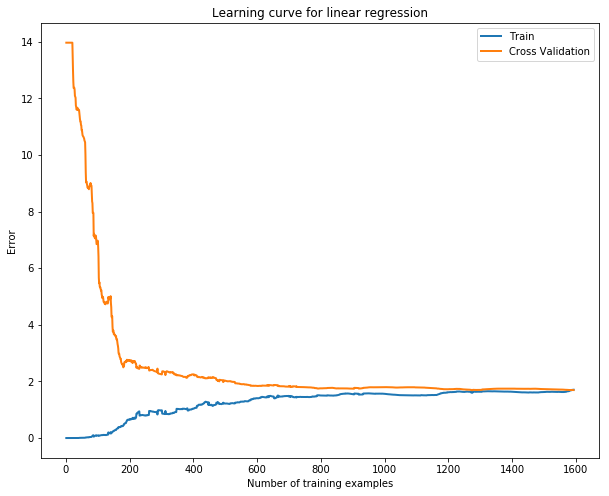

In [15]:
def curvaAprendizaje(X, y, Xval, yval, l):
    m = X.shape[0]
    errro_entren = np.zeros(m)
    error_val = np.zeros(m)
    
    for i in range(1, m + 1):
        theta = min_lineal_reg(X[:i, ], y[:i, ], l)
        errro_entren[i - 1] = 1.0 / (2 * i) * np.sum(np.square(X[:i, ].dot(theta) - y[:i, ]))
        error_val[i - 1] = 1.0 / (2 * Xval.shape[0]) * np.sum(np.square(Xval.dot(theta) - yval))
        
    return errro_entren, error_val
l = 0
error_entren, error_val = curvaAprendizaje(np.hstack((np.ones((m, 1)), X)), y, np.hstack((np.ones((X_train.shape[0], 1)), X_train)), y_train, l)

plt.figure(figsize=(10,8))
plt.plot(np.arange(1, m+1), error_entren, np.arange(1, m+1), error_val, lw=2)
plt.title('Learning curve for linear regression')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')



#### Aplicamos Regresion Logistica con sklearn

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs') # otros solver : liblinear, newton-cg, sag , saga
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

#### Examinamos 10 ejemplos de test. Por un lado la prediccion obtenida de los ejempolos de entrenamiento y por otro las y de prueba.

In [17]:
y_test = np.asarray(y_test)

num = np.random.randint(1,246)
print("10 muestras a partir de: ", num)
## prediccion sobre los test
print("", logreg.predict(X_test[num:num + 10]))
print(y_test[num:num + 10].reshape(1,-1))

10 muestras a partir de:  107
 [0 3 5 3 2 7 7 0 2 8]
[[0 3 5 3 2 7 7 0 2 8]]


#### Probabilidad , de todos los ejemplos de entrenamiento , con los de test. 

In [18]:

p = logreg.score(X_test, y_test)
print(" Pred : " , p * 100 ,  "%")

 Pred :  92.78996865203762 %


## 2. Support Vector Machines

##### Usamos la tecnica de suport vector machines , con los ejemplos de entrenamiento del apartado anterrior, los entenamos y obtenemos los mismo resultados de presición con un valor de C = 1.0, variando el Parámetro de penalización C del término de error  obtenemos una presicón del 94,3573 % con C = 0.03. AL utilizar SVM con kernel gaussiano , con unos parametras C = 10000 y sigma = 10, el valor obtenido es un poco superior 94.6708 %, esto varia dependiendo el tamaño de n y m.

In [19]:
data = read_csv("semeion.data",delimiter = r"\s+", header=None)
#data = pd.read_csv("semeion.data", sep=' ', header=None)

m = data.shape[0]

data['y'] = data.iloc[:,256]*0 + data.iloc[:,257]*1 + data.iloc[:,258]*2 + data.iloc[:,259]*3 + data.iloc[:,260]*4 + \
                data.iloc[:,261]*5 + data.iloc[:,262]*6 + data.iloc[:,263]*7 + data.iloc[:,264]*8 + data.iloc[:,265]*9

#creamos X e y
X = data.iloc[:,:256]
#etiquetas = data.iloc[:,256:-1]
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



#### SVM = regresion logistica

In [67]:
import sklearn.svm

clf = sklearn.svm.SVC(C=0.03, kernel='linear')
clf.fit( X_train, y_train )

prediccion = clf.predict(X_test).reshape((y_test.shape[0],1))

print ("Prediccion es de ", clf.score(X_test, y_test)* 100, "%")


Prediccion es de  94.35736677115987 %


In [68]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred), "\n")  
print(classification_report(y_test,y_pred))  

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  1]
 [ 0  1 31  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  2  0  0 29  0  0  1  0  0]
 [ 0  0  1  1  1 28  2  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  1]
 [ 0  1  0  0  0  0  0  0 33  0]
 [ 1  1  0  2  0  0  0  0  2 31]] 

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        38
          1       0.81      0.95      0.88        22
          2       0.97      0.97      0.97        32
          3       0.91      1.00      0.95        31
          4       0.97      0.91      0.94        32
          5       1.00      0.85      0.92        33
          6       0.94      1.00      0.97        33
          7       0.96      0.96      0.96        27
          8       0.94      0.97      0.96        34
          9       0.94      0.84      0.89        37

avg / total       0.95      0.94      0.94       319



### SVM con kernel gaussiano

In [80]:
C = 1000
sigma = 5
gamma = 1 / 2 / sigma**2

clf2 = sklearn.svm.SVC(kernel='rbf',C=C, gamma=gamma)
clf2.fit(X_train, y_train) 
prediccion = clf2.predict(X_test).reshape((y_test.shape[0],1))

print ("Prediccion es de ", clf2.score(X_test, y_test)* 100, "%")

Prediccion es de  95.92476489028213 %


In [81]:
y_pred = clf2.predict(X_test)
print(confusion_matrix(y_test,y_pred), "\n")
print(classification_report(y_test,y_pred))  

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  1]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0]
 [ 0  2  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 31  1  0  1  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 27  0  0]
 [ 0  1  0  1  0  0  0  0 32  0]
 [ 1  1  0  1  0  0  0  0  2 32]] 

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        38
          1       0.84      0.95      0.89        22
          2       1.00      1.00      1.00        32
          3       0.94      1.00      0.97        31
          4       1.00      0.91      0.95        32
          5       1.00      0.94      0.97        33
          6       0.97      1.00      0.99        33
          7       0.96      1.00      0.98        27
          8       0.91      0.94      0.93        34
          9       0.97      0.86      0.91        37

avg / total       0.96      0.96      0.96       319



La precision es buenas, es decir no se etiqueta de forma positiva muestras negativas.(tp / (tp + fp))

Recall altotambien , quiere decir que se encuentran todas la muestras positivas. (tp / (tp + fn)). 

f1-score es la media armonica de los dos anteriores, por tanto es buena tambien. 

support es el numero de apariciones de cada clase en y


## 3. Redes Neuronales

### Implementaremos el algoritmo de propagación hacia atrás para redes neuronales y lo aplicaremos a la tarea de reconocimiento de dígitos escrito a mano.

El primer objetivo de esta parte es implemetar el cálculo de la función de coste y gradiente de una red neuronal para los ejemplo de entrenamiento.
La red neuronal esta formada por 3 capas. A continuacion inicializamos los pesos aleatorios y calculamos el coste sin regularizar y regularizado, con el metodo de retropropagación.

### Aprendizaje de los parámetros. Entrenando Redes Neuronales

Utilizamos scipy.optimize.minimize para entrenar a la red neuronal y obtener los valores para Theta1 y Theta2 minimos. Entrenando a la red con lambda 0.05, 0.1, 1, 10 y 100 y 50, 100, 1000 y 5000  iteraciones obtenemos valores de presición distintos. A continuacion se muestra una tabla con los diferentes datos obtenidos.

La presición de predicción obtenida mas alta fue obtenida con los valores de lambda del 0.051 con 1000 iteraciones, con un numero de capas ocultas de 50.

<Figure size 432x288 with 0 Axes>

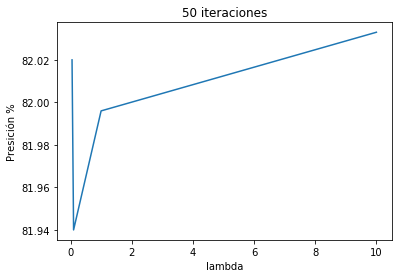

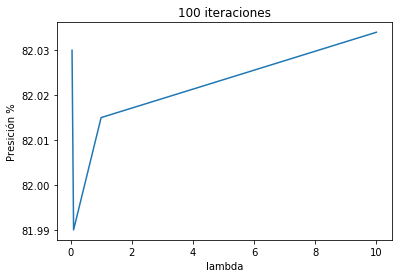

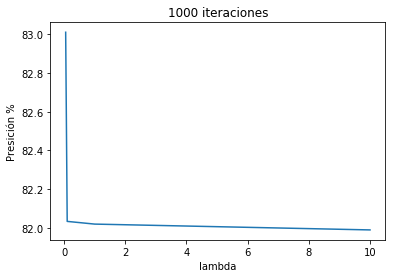

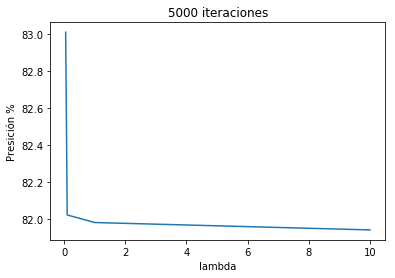

In [22]:
import scipy as sp
import matplotlib.pyplot as plt

# Creamos el array x 
x = np.array([0.05,0.1, 1, 10])


# Creamos el array y para 50 iteraciones
y1 = np.array([82.02,81.94, 81.996, 82.033])
# Creamos el array y para 100 iteraciones
y2 = np.array([82.03,81.99, 82.015, 82.034])
# Creamos el array y para 1000 iteraciones
y3 = np.array([83.01,82.034, 82.02, 81.99])
# Creamos el array y para 5000 iteraciones
y4 = np.array([83.01,82.021, 81.98, 81.94])

# Creamos una figura
plt.figure()

# Representamos



fig, ax = plt.subplots()
ax.plot(x, y1)
ax.set_title('50 iteraciones')
plt.xlabel('lambda')
plt.ylabel('Presición %')

fig2, ax2 = plt.subplots()
ax2.plot(x, y2)
ax2.set_title('100 iteraciones')
plt.xlabel('lambda')
plt.ylabel('Presición %')

fig3, ax3 = plt.subplots()
ax3.plot(x, y3)
ax3.set_title('1000 iteraciones')
plt.xlabel('lambda')
plt.ylabel('Presición %')

fig4, ax4 = plt.subplots()
ax4.plot(x, y4)
ax4.set_title('5000 iteraciones')
plt.xlabel('lambda')
plt.ylabel('Presición %')




# Mostramos en pantalla
plt.show()

In [23]:
num_entradas = 256   # Cada matriz de 256 componentes 
num_ocultas = 50   # jugar con este numero + alto mas se ajudta  probar valores mas altos , mas compleja red neuronal
num_etiquetas = 10  


# volvemos a abrir el data set para guardarlo como .mat y asi aprovechar funciones ya creadas.
data = read_csv("semeion.data",delimiter = r"\s+", header=None).values

print ("Data shape: ", data.shape) # array de numpy


X = data[:,:256].astype(float)
y = data[:,256:266].astype(float)

sve = [X, y]
io.savemat('semeionMat', dict([('X' , X), ('y' , y)]))


print ("X shape: ", X.shape)

print("Y shape: ", y.shape)

# cargamos semeio.mat
data = loadmat('semeionMat.mat')
# se pueden consultar las claves con data . keys ()
y = data['y']
print (data)
X = data['X']



Data shape:  (1593, 266)
X shape:  (1593, 256)
Y shape:  (1593, 10)
{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Jan 21 00:14:38 2019', '__version__': '1.0', '__globals__': [], 'X': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'y': array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])}


(-0.5, 15.5, 159.5, -0.5)

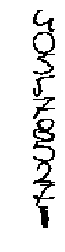

In [24]:
m = len(X)
#256 atributos
# 1593 instancias
sample = np.random.choice(X.shape[0], 10)
plt.imshow(X[sample, :].reshape(-1, 16), cmap='Greys') 
plt.axis('off')

### Función de coste y gradiente
\begin{equation*}
J(\theta) = 
-\frac{1}{m} ((log(g(X\theta)))^T y + (log (1 - g(X\theta)))^T(1 - y)) + \frac {\lambda}{2m} \sum_{j=1}^n \theta_j^2
\end{equation*}

\begin{equation*}
\frac{\delta J(\theta)} {{\delta}{ \theta_j}}  = 
\frac{1}{m} X^T(g(X\theta) -y) + \frac {\lambda}{m} \theta_j
\end{equation*}

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prima(z):
    """calculo de la derivada  de la fincion sigmoide"""
    return sigmoid(z) * (1 - sigmoid(z))


def costFunction(theta, X, y, l):
    m = len(y)
    hipTX = sigmoid(np.dot(X, theta))
    thetaSinCero = np.insert(theta[1:], 0, 0)
    c = - ((np.dot(y, np.log(hipTX).T) + np.dot(np.log(1 - hipTX).T, (1 - y))) / m) + l/(2*m) * np.sum(np.square(theta[1:]))
    g= (np.dot(X.T, (hipTX -y)) + l * thetaSinCero) / m
    return c,g

def oneVsAll (X, y , num_etiquetas , reg ) :
  
    all_theta = np.zeros((num_etiquetas, X.shape[1] + 1))
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    initial_theta = np.zeros(X.shape[1])

    for i in range(0, num_etiquetas):
        label = 10 if i == 0 else i
        result = opt.fmin_tnc(costFunction, initial_theta, args=(X,(y==label).astype(int),reg))
        print ('etiquetas =', label)
        all_theta[i, :] = result[0]
        
    return all_theta

def pesosAleatorios (L_in , L_out):
    epsilon_init = 0.12
    
    return np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

### Algoritmo de Backpropagation

In [26]:
def backprop(params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    
    theta1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas , (num_entradas + 1)))
    theta2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):] ,(num_etiquetas , (num_ocultas + 1)))
    
    m = len(X)

    
    theta1_s = np.square(theta1[:,1:])
    theta2_s = np.square(theta2[:,1:])
    
    X = np.hstack((np.ones((X.shape[0], 1)), X))#añado unos a la col 0, shape 5000,401
    
    #print (X.shape)
    #print (theta1.T.shape)
    #print (theta2.T.shape)
    a1 = X
    
    z2 = np.dot(a1, theta1.T)
    a2 = sigmoid(z2) 
    a2 = np.hstack((np.ones((X.shape[0], 1)), a2)) #añado col de unos
    
    z3 = np.dot(a2, theta2.T)
    a3 = sigmoid(z3)
    
    Y = np.zeros((m,num_etiquetas))
    #for i in range(m):
     #   Y[i, y[i]-1] = 1
        
    J = 0
   
    for i in range(m):
        J += -(np.sum(np.dot(Y[i,] , np.log(a3[i,])) + np.dot((1- Y[i,]) , np.log(1- a3[i,]))) / m) 
    #print (J)
    J += reg/(2*m) * (np.sum(theta1_s) + np.sum(theta2_s))
    #g= (np.dot(X.T, (hipTX -y)) + l * thetaSinCero) / m 
    
    
    ##CALCULO DEL GRADIENTE RETRO-PROPAGACION
    d3 = a3 - Y
    D2 = np.dot(d3.T, a2)
    
    z2 = np.hstack((np.ones((X.shape[0], 1)), z2))
    d2 = np.dot(d3, theta2) * sigmoid_prima(z2)
    d2 = d2[:, 1:]
    D1 = np.dot(d2.T, X)
    
    theta1Grad = 1.0 * D1 / m
    theta1Grad[:, 1:] = theta1Grad[:, 1:] + 1.0 * reg / m * theta1[:, 1:]
    
    theta2Grad = 1.0 * D2 / m
    theta2Grad[:, 1:] = theta2Grad[:, 1:] + 1.0 * reg / m * theta2[:, 1:]

    #grad = np.hstack((theta1Grad.ravel(), theta2Grad.ravel()))
    grad = np.concatenate([theta1Grad.ravel(), theta2Grad.ravel()])
    
    return J, grad




#### Inicializamos los pesos aleatorios ( Thetas )

In [27]:
initial_theta_1 = pesosAleatorios(num_entradas, num_ocultas)
initial_theta_2 = pesosAleatorios(num_ocultas, num_etiquetas)
initial_params_rn = np.hstack((initial_theta_1.ravel(), initial_theta_2.ravel()))
print (initial_params_rn)
print(initial_params_rn.shape)

[-0.09301544  0.03168254  0.06020648 ...  0.10036554 -0.07779565
  0.0430952 ]
(13360,)


#### Regularización

In [28]:
reg= 0
cost1, grad1 = backprop(initial_params_rn, num_entradas, num_ocultas, num_etiquetas, X, y,0.0)
costReg, grad2 = backprop(initial_params_rn, num_entradas, num_ocultas, num_etiquetas, X, y,reg)
print ("coste 1 con lambda = 0: ", cost1)
print ("coste 1 con lambda = 1 regularizado: ", costReg)

coste 1 con lambda = 0:  7.564224314596358
coste 1 con lambda = 1 regularizado:  7.564224314596358


#### Chequeo del gradiente

In [29]:
reg = 0
checkNNGradients(backprop, reg)
J , _ = backprop(initial_params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg)
print (J,checkNNGradients(backprop, reg))

7.564224314596358 [ 1.09936005e-10 -5.40444946e-12  8.35869221e-12  3.25026533e-11
 -1.16232995e-10  6.88391011e-12 -3.45132256e-11 -1.04031686e-10
 -1.65033209e-10  1.54594809e-11 -8.23925372e-11 -2.37331849e-10
 -6.07836559e-11  4.01101374e-12 -2.04831707e-11 -7.62467589e-11
  4.92536290e-11 -1.96296278e-12  2.35443748e-11  5.41779052e-11
  6.21963592e-11  1.16381904e-11  6.82254253e-12  2.03542738e-12
  2.03469464e-11  1.81471504e-11  7.11513071e-11  1.57016622e-11
  1.14082632e-11  9.22056875e-12  1.64337988e-11  2.11696216e-11
  7.42017559e-11  1.75510162e-11  6.40237863e-12  1.32329148e-11
  1.64266378e-11  1.93563499e-11]


### Aprendizaje de los parámetros. Entrando Redes Neuronales



In [30]:
reg = 0.005
options={'maxiter': 1000} ## mas iteraciones cientos miles
res = opt.minimize (backprop, initial_params_rn, 
                    args=(num_entradas, num_ocultas, 
                    num_etiquetas, X, y,reg),method = 'TNC',
                    jac=True, options=options )
param_en = res.x

#theta1 y theta de params_rn
Theta1 = np.reshape(param_en[:num_ocultas * (num_entradas + 1)],
                    (num_ocultas, (num_entradas + 1)))

Theta2 = np.reshape(param_en[(num_ocultas * (num_entradas + 1)):],
                    (num_etiquetas, (num_ocultas + 1)))

(-0.5, 15.5, 15.5, -0.5)

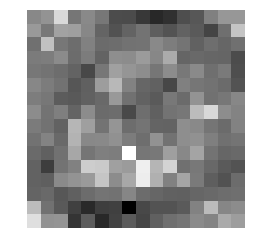

In [31]:
plt.imshow(Theta1[:1, 1:].reshape(-1, 16), cmap='Greys')

plt.axis('off')

In [32]:
def displayData(X):
    num_plots = int(np.size(X, 0)**.7)
    fig, ax = plt.subplots(num_plots, num_plots, sharex=True, sharey=True)
    plt.subplots_adjust(left=0, wspace=0, hspace=0)
    img_num = 0
    print (num_plots)
    for i in range(num_plots):
        for j in range(num_plots):
            # Convert column vector into 20x20 pixel matrix
            # transpose
            img = X[img_num, :].reshape(-1, 16)
            ax[i][j].imshow(img, cmap='Greys')
            ax[i][j].set_axis_off()
            img_num += 1

    return (fig, ax)



(50, 256)
2


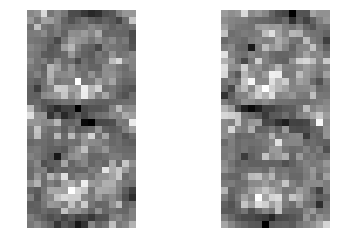

In [33]:
print(Theta1[:, 1:].shape)
fig, ax = displayData(Theta1[:4, 1:])


#### Prediccion

In [34]:
def modelo(theta1, theta2, X):
    X = np.hstack((np.ones((X.shape[0], 1)), X))#añado unos a la col 0, shape 5000,401
    a1 = sigmoid(np.dot(X, theta1.T)) #calculo a1
    a1 = np.hstack((np.ones((X.shape[0], 1)), a1)) #añado col de unos
    
    a2 = sigmoid(np.dot(a1, theta2.T))

    p = np.argmax(a2, axis=1)#índices de los valores máximos del eje 1
    p += 1 #los indices arrancan desde 1 no desde cero
  
    return p

In [35]:
p = modelo (Theta1, Theta2, X )
print (p.shape)
#print (Y_np.shape)

if p[0] == 10:
    indice = 0
else:
    indice = p

pred = np.zeros(10)

pred[indice] = 1

print (pred)
print ("Prediccion de ",p[0],"es de ", np.mean(pred == y)* 100, "%")



(1593,)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Prediccion de  5 es de  81.99623352165725 %


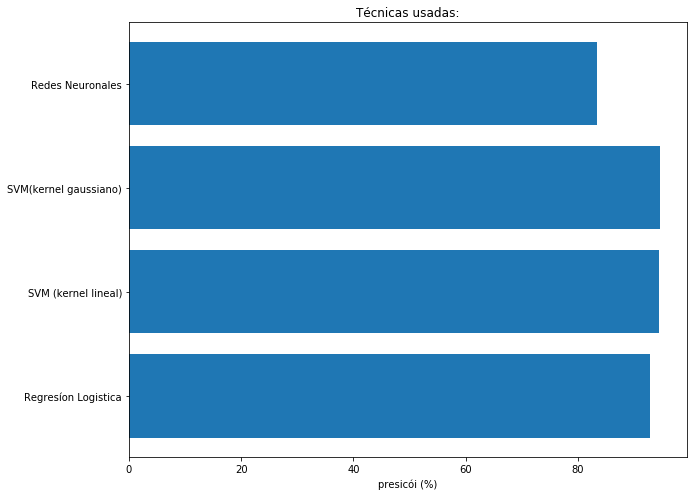

In [36]:
Tecnicas = ("Regresíon Logistica", "SVM (kernel lineal)","SVM(kernel gaussiano)", "Redes Neuronales")
posicion_y = np.arange(len(Tecnicas))
unidades = (92.7891, 94.3573, 94.6708, 83.4213)

plt.figure(figsize=(10,8))
plt.barh(posicion_y, unidades, align = "center")
plt.yticks(posicion_y, Tecnicas)
plt.xlabel('presicói (%)')
plt.title("Técnicas usadas:")

plt.savefig('grf_barra_total.png')